### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
os.getcwd()

'C:\\Users\\Admin'

### Import data set

In [3]:
data=pd.read_excel(r'C:\Users\Admin\Downloads\Data Analytics Assignment.xlsx',2,skiprows=7,index_col='Week of Search Day',parde_dates=True)

In [4]:
data.head()

,Searches,Clicks,Clickrevenue
Week of Search Day,,,
2020-09-27,40946,1853,39554
2020-10-04,105259,4621,92890
2020-10-11,105345,4605,92688
2020-10-18,105801,4449,91564
2020-10-25,108727,4198,88158


### We hava weekly data on sunday  so set index 'W'

In [6]:
data.index.freq='W-SUN'

### Plot data 
#### Plot Searches per week

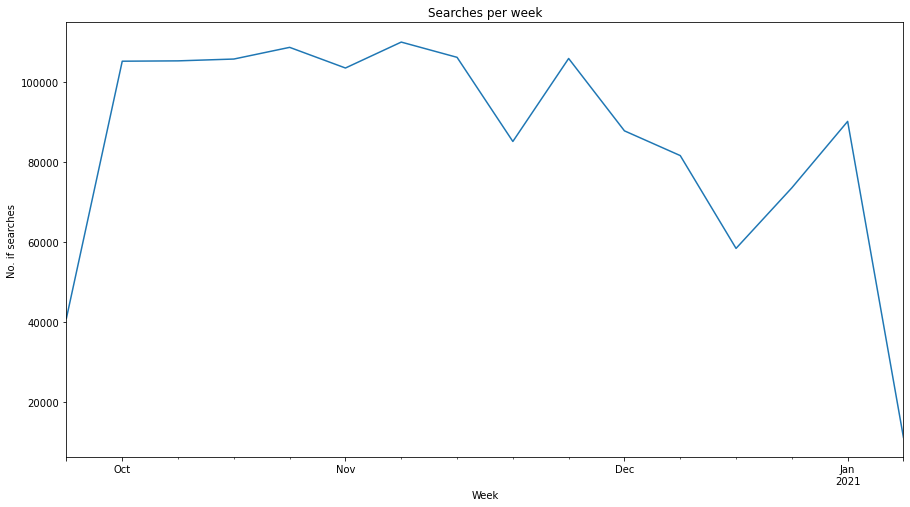

In [7]:
title='Searches per week'
ylabel='No. if searches'
xlabel='Week'


ax = data['Searches'].plot(figsize=(15,8),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);


#### Plot Clickd per week

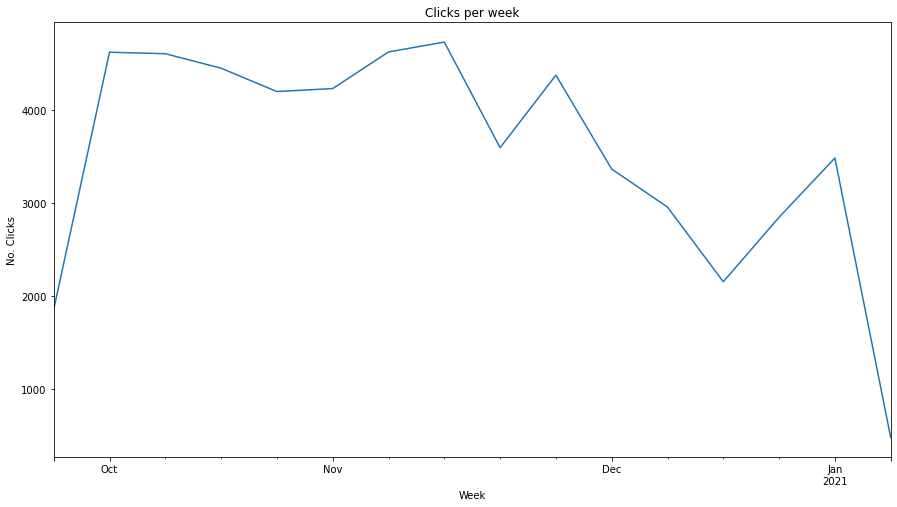

In [8]:
title='Clicks per week'
ylabel='No. Clicks'
xlabel='Week'


ax = data['Clicks'].plot(figsize=(15,8),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);


#### Plot Click revenue per week

In [9]:
title='Click revenue per week'
ylabel='Click revenue'
xlabel='Week'


ax = data1['Clickrevenue'].plot(figsize=(15,8),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);


NameError: name 'data1' is not defined

### Conclusion: 
From above three graphs we conclude that all three graphs show same behaviour and they are dependent 

### Plot ACF and PACF

In [ ]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
title = 'Autocorrelation: Weekly Clickrevenue'
lags = 7
plot_acf(data1,title=title,lags=lags);

### Coclusion:
There is sharp declined Clickrevenue therefore there is no autocorrelation

In [ ]:
title = 'Partial Autocorrelation: Weekly Clickrevenue'
lags = 7
plot_pacf(data1,title=title,lags=lags);

### Check for stationarity in data

In [10]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series,title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')
     
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesisn i.e. Stationary")
    else:
        print("Weak evidence against the null hypothesis i.e. Non-Stationary")
        

In [11]:
adf_test(data['Clickrevenue'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -1.521265
p-value                  0.522967
# lags used              0.000000
# observations          15.000000
critical value (1%)     -3.964443
critical value (5%)     -3.084908
critical value (10%)    -2.681814
Weak evidence against the null hypothesis i.e. Non-Stationary


### Conclusion: 
The time series is not stationary that is mean and variance are not constant over time

### Splitting into train and test
WE have to forecast for 10 Jan so take 10 Jan as test data

In [12]:
train=data.iloc[:-1,:]
test=data.iloc[-1:,]

### Fit ARIMA model

In [13]:
from pmdarima import auto_arima

In [14]:
au_arima= auto_arima(train['Clickrevenue'])

In [15]:
au_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   15
Model:                        SARIMAX   Log Likelihood                -168.560
Date:                Tue, 19 Jan 2021   AIC                            341.119
Time:                        19:21:04   BIC                            342.535
Sample:                             0   HQIC                           341.104
                                 - 15                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.979e+04   6058.524     13.170      0.000    6.79e+04    9.17e+04
sigma2      3.374e+08   1.82e+08      1.850      0.064   -2.01e+07    6.95e+08
===================================================================================
Ljung-Box (Q):                       22.44   Jarque-Bera (JB):                 1.60
Prob(Q):                              0.07   Prob(JB):                         0.45
Heteroskedasticity (H):               0.73   Skew:                            -0.76
Prob(H) (two-sided):                  0.74   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### From pmd_arima we to have to use an exogenous variable

We use model with exogenous variable because we have not sufficient data and data does not show any trend and clickrevenue is depend on clicks and searches

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Clicks as exogenous variables

In [17]:
model = SARIMAX(train['Clickrevenue'],exog=train['Clicks'],order=(1,0,0),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Clickrevenue   No. Observations:                   15
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -139.157
Date:                Tue, 19 Jan 2021   AIC                            284.313
Time:                        19:21:05   BIC                            286.437
Sample:                    09-27-2020   HQIC                           284.290
                         - 01-03-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Clicks        19.4558      1.604     12.128      0.000      16.311      22.600
ar.L1          0.9195      0.129      7.125      0.000       0.667       1.172
sigma2      5.908e+06   2.35e+06      2.518      0.012    1.31e+06    1.05e+07
===================================================================================
Ljung-Box (Q):                       10.00   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.76   Prob(JB):                         1.00
Heteroskedasticity (H):               2.65   Skew:                            -0.02
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test[['Clicks']]  # requires two brackets to yield a shape of (35,1)
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX(1,0,0) Predictions')

In [19]:
predictions

2021-01-10    11772.598649
Freq: W-SUN, Name: SARIMAX(1,0,0) Predictions, dtype: float64

### Conclusion:
From above prediction we observe that for our test data y_observe=9107 and y_forecast=11772
the difference is 2665
